In [1]:
import tensorflow as tf

2023-10-30 19:10:23.956250: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-30 19:10:23.979107: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-30 19:10:23.979130: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-30 19:10:23.979145: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-30 19:10:23.983983: I tensorflow/core/platform/cpu_feature_g

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [9]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
input_size = train_images.shape[1]*train_images.shape[2]
train_size = train_images.shape[0]
test_size = test_images.shape[0]

In [11]:
train_size

60000

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
model = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="softmax")
])

2023-10-30 19:17:38.538912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 19:17:38.542289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-10-30 19:17:38.542400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [8]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [12]:
train_images = train_images.reshape(train_size, input_size)
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape(test_size, input_size)
test_images = test_images.astype("float32") / 255

In [13]:
train_images.shape

(60000, 784)

In [15]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10


2023-10-30 19:25:54.777499: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-10-30 19:25:54.931266: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7db96c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-10-30 19:25:54.931284: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti Laptop GPU, Compute Capability 8.6
2023-10-30 19:25:54.934284: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-10-30 19:25:54.939789: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8700


 31/938 [..............................] - ETA: 1s - loss: 1.2447 - accuracy: 0.6794   

2023-10-30 19:25:54.978288: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 [==============================] - 2s 1ms/step - loss: 0.3156 - accuracy: 0.9123
Epoch 2/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1507 - accuracy: 0.9561
Epoch 3/10
938/938 [==============================] - 1s 1ms/step - loss: 0.1074 - accuracy: 0.9682
Epoch 4/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0835 - accuracy: 0.9755
Epoch 5/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0696 - accuracy: 0.9792
Epoch 6/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0591 - accuracy: 0.9824
Epoch 7/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0505 - accuracy: 0.9850
Epoch 8/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0444 - accuracy: 0.9871
Epoch 9/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0383 - accuracy: 0.9890
Epoch 10/10
938/938 [==============================] - 1s 1ms/step - loss: 0.0338 - accuracy: 0.9903


In [16]:
test_digits = test_images[500:510]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 36ms/step


In [17]:
predictions

array([[1.10493507e-19, 2.62698307e-14, 1.14402212e-11, 1.00000000e+00,
        6.30426553e-19, 1.17504628e-09, 8.67870354e-25, 5.74575516e-14,
        3.27638437e-12, 3.70866844e-11],
       [1.24078886e-10, 1.35712519e-16, 1.08679843e-10, 1.30857534e-05,
        5.98118731e-07, 2.74301581e-09, 3.55448525e-15, 2.72833449e-06,
        6.69805267e-10, 9.99983549e-01],
       [2.45346438e-10, 1.37482567e-10, 3.31273897e-09, 3.46456000e-05,
        1.05196581e-11, 9.99932528e-01, 2.65662992e-10, 7.97039519e-08,
        4.48976145e-08, 3.26615773e-05],
       [1.12185987e-12, 4.64935707e-13, 1.00000000e+00, 6.18165019e-10,
        2.11983428e-17, 4.32993658e-12, 3.88235307e-15, 4.16106189e-14,
        4.44931786e-10, 1.81879377e-18],
       [6.39444622e-08, 9.76391137e-01, 2.68826789e-05, 1.04072467e-04,
        8.46184324e-04, 4.01875968e-06, 5.04073796e-07, 2.13953387e-02,
        1.03483745e-03, 1.96832043e-04],
       [1.67071489e-14, 3.32002287e-10, 2.13608473e-08, 9.99945402e-01,
   

500th number in the test dataset is predicted as 3


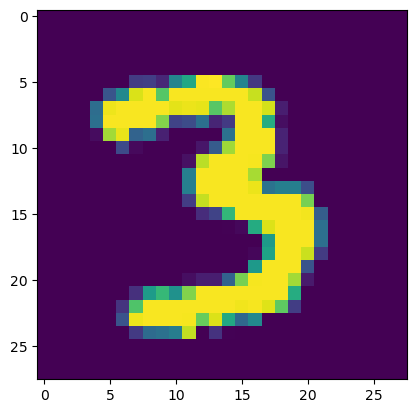

In [25]:
import matplotlib.pyplot as plt

img = test_images[500].reshape(28, 28)
img.shape
plt.imshow(img)
predicted_digit = predictions[0].argmax()
print(f"500th number in the test dataset is predicted as {predicted_digit}")